In [1]:
import os
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
division=['with_mask','without_mask']

In [3]:
for d in division:
    path_of_images=os.path.join('Train',d)
    
    print(path_of_images)

Train\with_mask
Train\without_mask


In [4]:
images=[]
for d in division:
    p=os.path.join('Train',d)
    category=division.index(d)
    for file in os.listdir(p):
        i_path=os.path.join(p,file)
        img=cv2.imread(i_path)
        img=cv2.resize(img,(50,50))
        images.append([img,category])

In [5]:
img_mask=[]
p=os.path.join('Train','with_mask')
category=0
for file in os.listdir(p):
    i_path=os.path.join(p,file)
    img=cv2.imread(i_path)
    img=cv2.resize(img,(50,50))
    img_mask.append([img,category])

In [6]:
len(img_mask)

677

In [7]:
img_without_mask=[]
p=os.path.join('Train','without_mask')
category=1
for file in os.listdir(p):
    i_path=os.path.join(p,file)
    img=cv2.imread(i_path)
    img=cv2.resize(img,(50,50))
    img_without_mask.append([img,category])

In [8]:
random.shuffle(images)

In [9]:
len(img_without_mask)

713

In [10]:
i=[] #contains images
l=[] #contains labels
for characteristics,category in images:
    i.append(characteristics)
    l.append(category)


<BarContainer object of 2 artists>

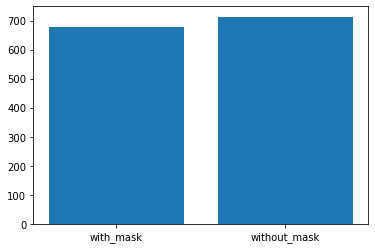

In [11]:
plt.bar(division,[len(img_mask),len(img_without_mask)])

In [12]:
np.save('imageSet.npy',i)

In [13]:
imageSet=np.load('imageSet.npy')
imageSet.shape

(1390, 50, 50, 3)

In [14]:
x= imageSet.reshape(1390,50*50*3)

In [15]:
tag={0:'Mask',1:'Without Mask'}

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,l,test_size=0.2)

In [17]:
x_train.shape

(1112, 7500)

In [18]:
x_test.shape

(278, 7500)

In [19]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [20]:
y_pred=svm.predict(x_test)

In [21]:
accu=accuracy_score(y_test,y_pred)
print (accu)

0.9496402877697842


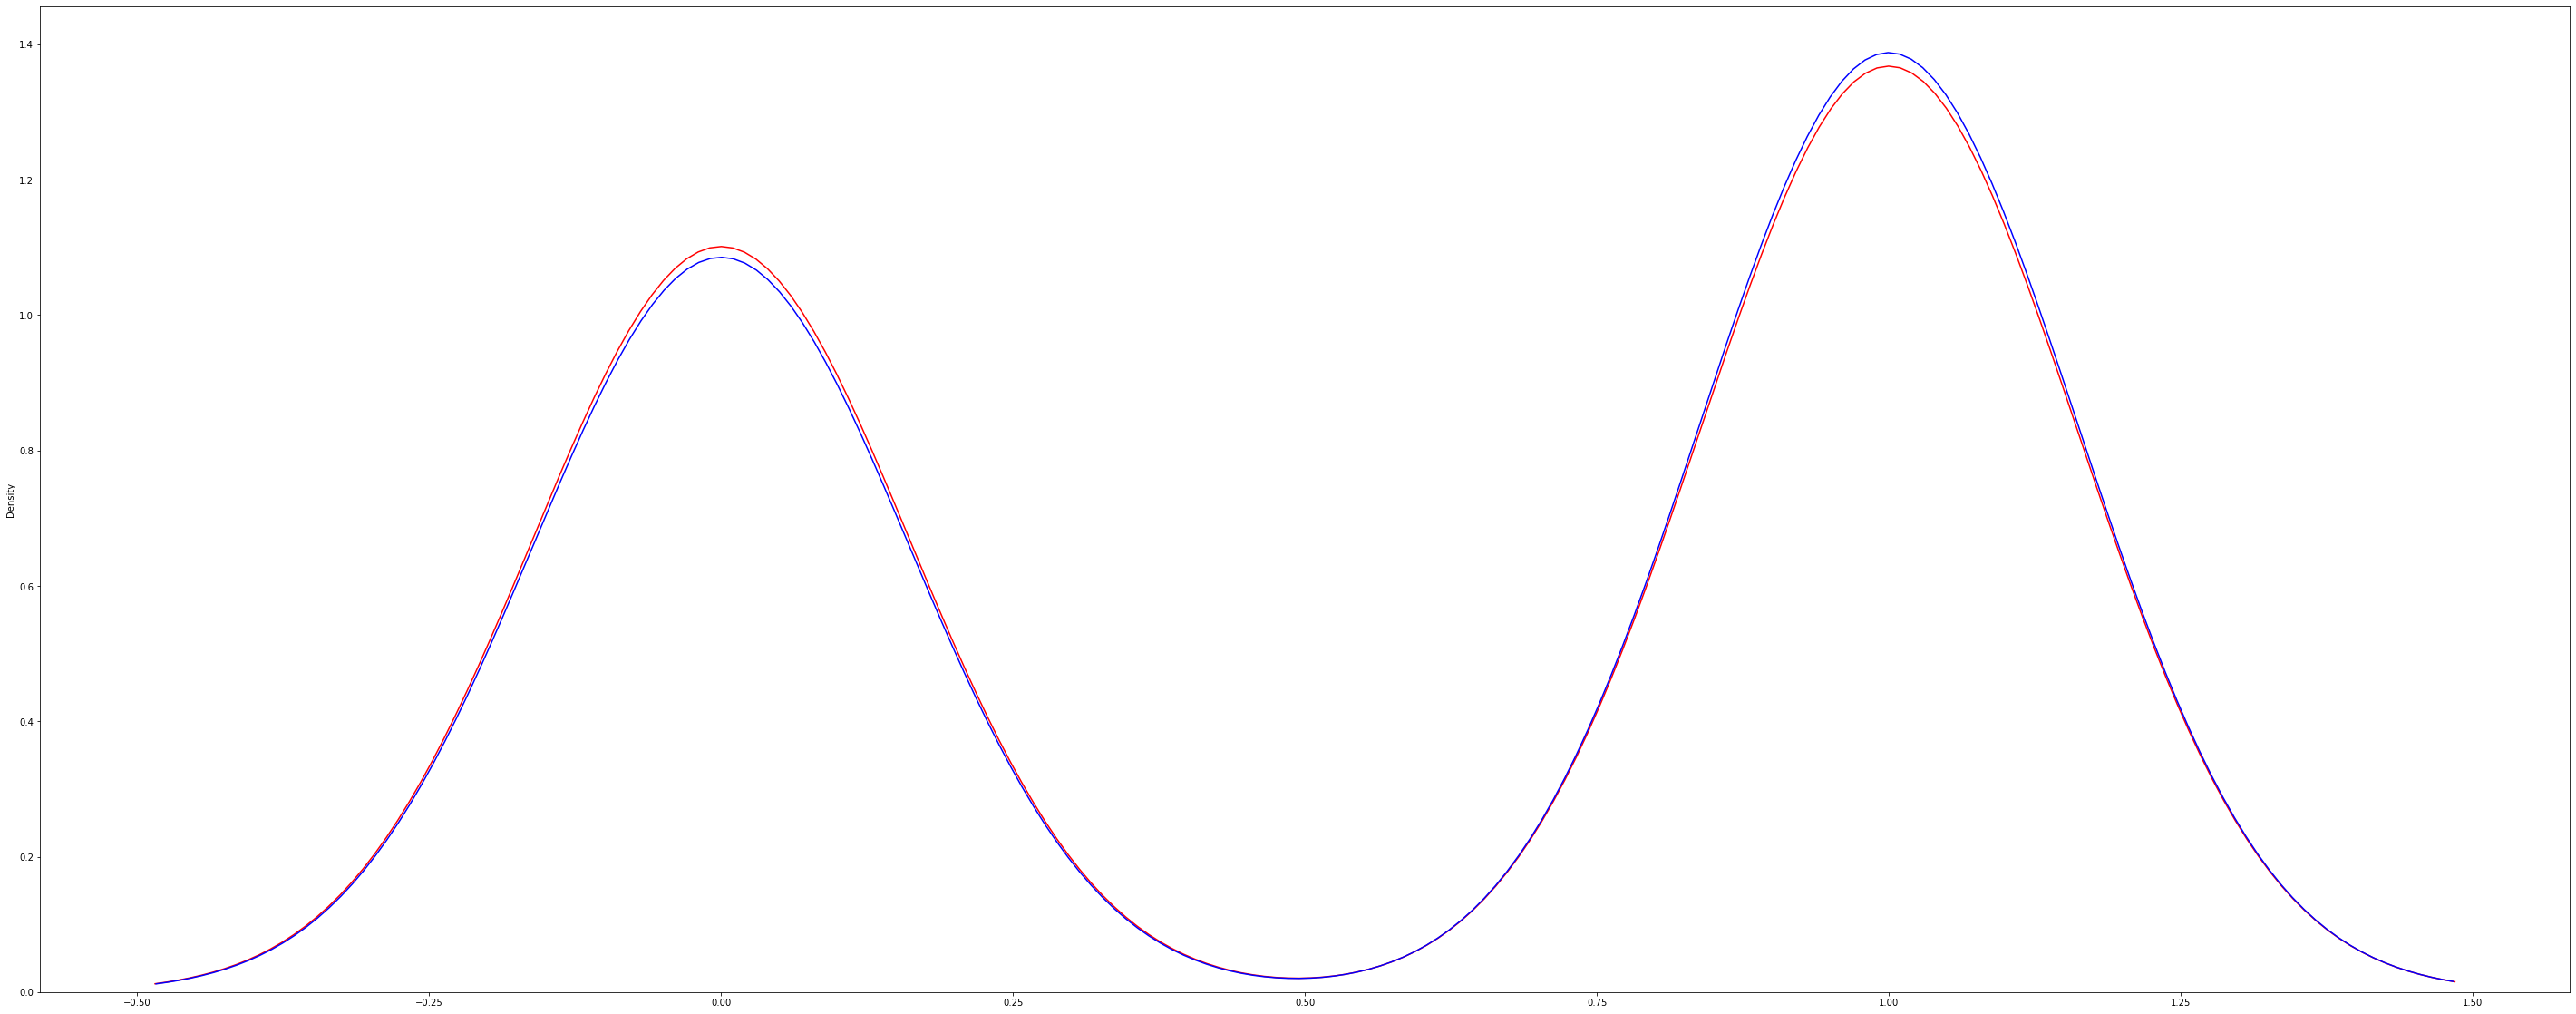

In [22]:
fig = plt.figure(figsize = (50, 20))
sns.kdeplot(y_test,color='r', label='Actual')
sns.kdeplot(y_pred,color='b', label='Predicted')
plt.show()

In [ ]:
data_haar = cv2.CascadeClassifier('data.xml')
cap= cv2.VideoCapture(0)
images=[]
font=cv2.FONT_HERSHEY_COMPLEX
while True:
    count,img=cap.read()
    if count:
        face=data_haar.detectMultiScale(img)
        for x,y,w,h in face:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),4)
            faces= img[y:y+h, x:x+w, : ]
            faces=cv2.resize(faces,(50,50))
            faces=faces.reshape(1,-1)
           
            prediction = svm.predict(faces)[0]
            t=tag[int(prediction)]
            cv2.putText(img,t,(x,y),font,1,(244,250,250),2)
            print(t)
        cv2.imshow('result',img)
        if cv2.waitKey(2)==27 or len(images) >= 200: 
            break
cap.release() 
cv2.destroyAllWindows()

Without Mask
Mask
Without Mask
Mask
Without Mask
Without Mask
Mask
Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Mask
Mask
Without Mask
Mask
Without Mask
Mask
Mask
Without Mask
Without Mask
Mask
Mask
Without Mask
Mask
Without Mask
Mask
Without Mask
Mask
Without Mask
Mask
Without Mask
Without Mask
Mask
Without Mask
Mask
Mask
Mask
Mask
Mask
Mask
Without Mask
Mask
Mask
Without Mask
Mask
Without Mask
Without Mask
Mask
Without Mask
Mask
Without Mask
Mask
Without Mask
Mask
Mask
Without Mask
Mask
Mask
Without Mask
Mask
Without Mask
Mask
Without Mask
Without Mask
Withou

Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Mask
Without Mask
Mask
Mask
Without Mask
Without Mask
Without Mask
Without Mask
Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Without Mask
Mask
Without Mask
Without Mask
Without Mask
Without Mask
